Use o Pandas e a base de dados da aula para responder as seguintes questões:

Entrega: 4/12

# Dataset 1

O mesmo da aula

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
vg = pd.read_csv("./dataset/Video_Games_Sales_as_at_22_Dec_2016.csv")

Quais gêneros tem mais jogos?

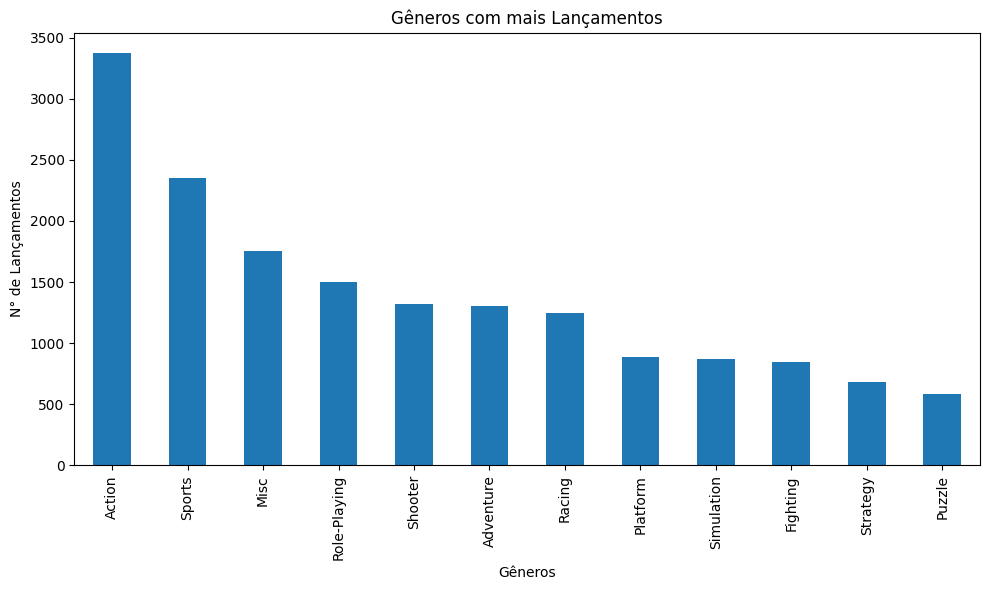

In [3]:
genres_most_games = vg.Genre.value_counts()
genres_most_games.plot(kind='bar', figsize=(10,6))
plt.title("Gêneros com mais Lançamentos")
plt.xlabel("Gêneros")
plt.ylabel("N° de Lançamentos")
plt.tight_layout()
plt.show()

Quais anos tiveram mais lançamentos?

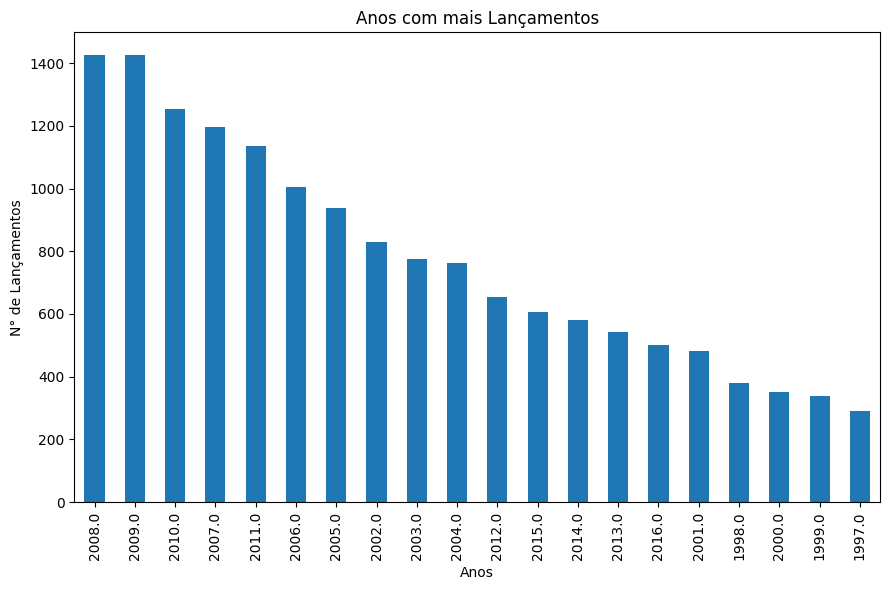

In [192]:
vg.Year_of_Release.value_counts().head(20).plot(kind='bar', figsize=(9,6))
plt.title("Anos com mais Lançamentos")
plt.xlabel("Anos")
plt.ylabel("N° de Lançamentos")
plt.tight_layout()
plt.show()

Os cinco anos com mais lançamentos, com estes lançamentos divididos por gênero

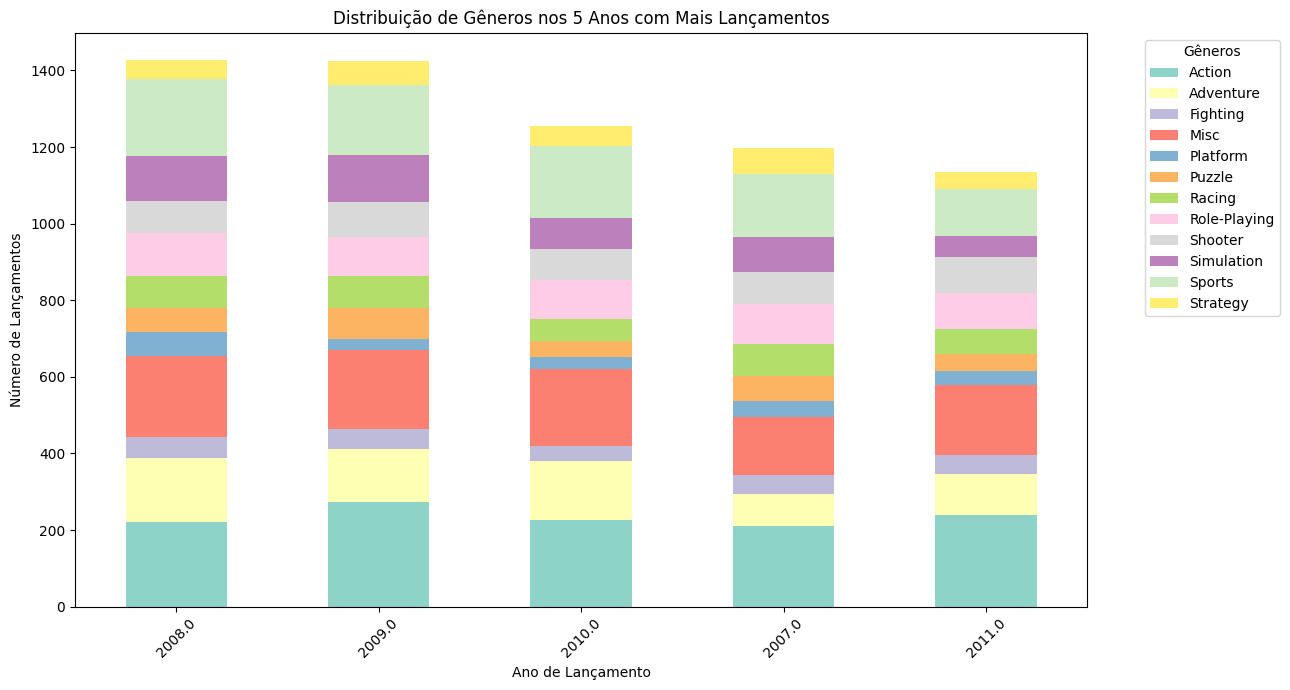

In [193]:
top5years = vg.Year_of_Release.value_counts().head(5).sort_values(ascending=False).index
filteredVg = vg[vg.Year_of_Release.isin(top5years)]
genre_counts = filteredVg.groupby(['Year_of_Release', 'Genre']).size().unstack(fill_value=0)
genre_counts = genre_counts.loc[top5years]
ax = genre_counts.plot(kind='bar', stacked=True, figsize=(13, 7), colormap='Set3')

plt.title('Distribuição de Gêneros nos 5 Anos com Mais Lançamentos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Lançamentos')
plt.xticks(rotation=45)
plt.legend(title='Gêneros', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Faça um gráfico de anos por total de vendas globais.

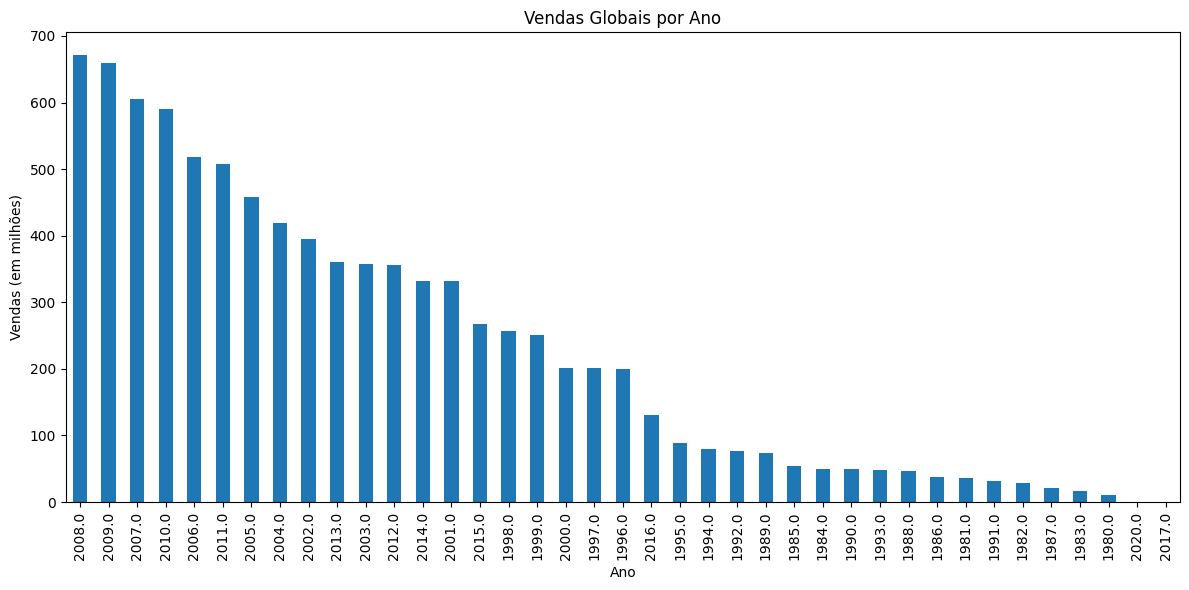

In [194]:
global_sales_by_year = vg.groupby('Year_of_Release')['Global_Sales'].sum().sort_values(ascending=False)
global_sales_by_year.plot(kind='bar', figsize=(12,6))
plt.title("Vendas Globais por Ano")
plt.xlabel("Ano")
plt.ylabel("Vendas (em milhões)")
plt.tight_layout()
plt.show()

Para cada ano, qual o gênero com mais lançamentos daquele ano.

In [41]:
genre_count = vg.groupby(['Year_of_Release', 'Genre']).size()
most_launched_genre_per_year = genre_count.groupby('Year_of_Release').idxmax()
most_launches_count_per_year = genre_count[most_launched_genre_per_year]
most_launches_count_per_year#.plot(kind='barh', figsize=(9,8))
#plt.title("Gênero mais Lançado em cada ano")
#plt.xlabel("N° de Lançamentos")
#plt.ylabel("Ano, Gênero mais Lançado")
#plt.tight_layout()
#plt.show()

Year_of_Release  Genre       
1980.0           Misc              4
1981.0           Action           25
1982.0           Action           18
1983.0           Action            7
1984.0           Puzzle            3
1985.0           Platform          4
1986.0           Action            6
1987.0           Sports            4
1988.0           Platform          4
1989.0           Puzzle            5
1990.0           Action            3
1991.0           Sports            7
1992.0           Fighting          7
1993.0           Fighting         11
1994.0           Fighting         22
1995.0           Fighting         29
1996.0           Sports           52
1997.0           Sports           46
1998.0           Sports           70
1999.0           Sports           62
2000.0           Sports           81
2001.0           Sports           96
2002.0           Sports          188
2003.0           Action          144
2004.0           Action          125
2005.0           Action          192
2006.0  

Para cada ano, qual foi o gênero mais _vendido_ daquele ano

In [ ]:
sales_per_genre = vg.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum()
most_sales_genre_per_year = sales_per_genre.groupby('Year_of_Release').idxmax()
most_sales_count_per_year = sales_per_genre.loc[most_sales_genre_per_year]
most_sales_count_per_year#.plot(kind='barh', figsize=(12, 8), color='skyblue')
#plt.title("Gênero mais Vendido em cada ano")
#plt.xlabel("N° de Vendas Globais")
#plt.ylabel("Ano, Gênero mais vendido")
#plt.tight_layout()
#plt.show()


Year_of_Release  Genre       
1980.0           Shooter           7.07
1981.0           Action           14.84
1982.0           Puzzle           10.03
1983.0           Platform          6.93
1984.0           Shooter          31.10
1985.0           Platform         43.17
1986.0           Action           13.74
1987.0           Fighting          5.42
1988.0           Platform         27.73
1989.0           Puzzle           37.75
1990.0           Platform         22.97
1991.0           Platform          7.64
1992.0           Fighting         15.25
1993.0           Platform         18.67
1994.0           Platform         28.74
1995.0           Platform         16.69
1996.0           Role-Playing     43.96
1997.0           Racing           31.91
1998.0           Sports           41.79
1999.0           Role-Playing     49.09
2000.0           Sports           41.19
2001.0           Action           59.39
2002.0           Action           86.76
2003.0           Action           67.93
2004.0    

Um gráfico contendo para cada plataforma, o número de vendas da mesma.

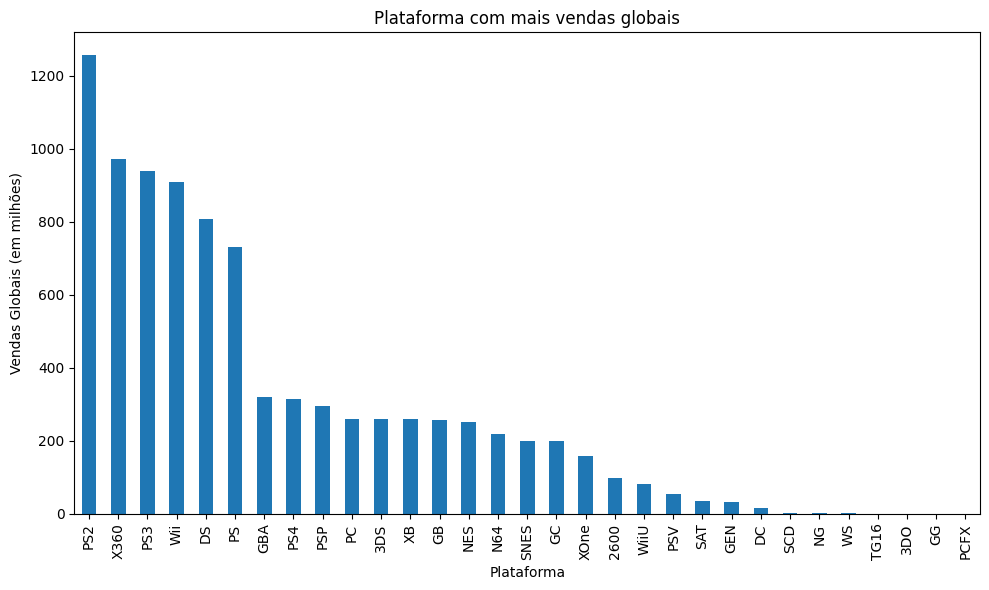

In [36]:
platforms = vg.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
vg = vg[vg.Global_Sales.notnull()]
platforms.plot(kind='bar', figsize=(10,6))
plt.title("Plataforma com mais vendas globais")
plt.xlabel("Plataforma")
plt.ylabel("Vendas Globais (em milhões)")
plt.tight_layout()
plt.show()

Faça uma tabela comparando, para cada gênero, as vendas globais, na américa do norte, europa e japão.

<Axes: xlabel='Genre'>

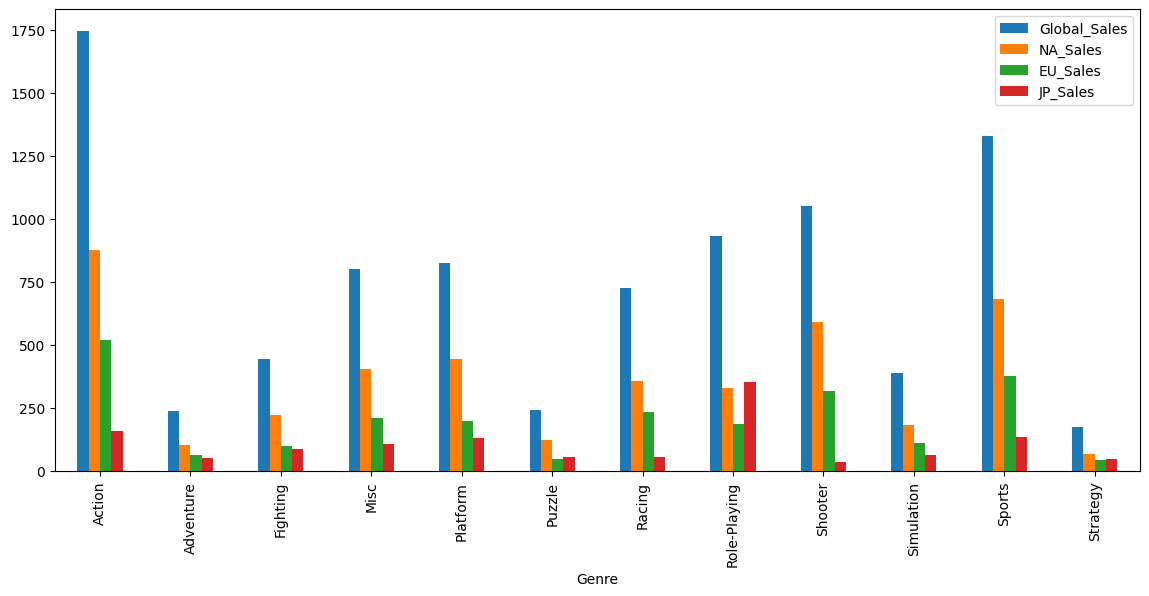

In [79]:
sales_per_region = vg.groupby('Genre')[['Global_Sales' ,'NA_Sales' ,'EU_Sales', 'JP_Sales']].sum()
sales_per_region.plot(kind='bar', figsize=(14, 6))

Faça um gráfico de vendas por publisher

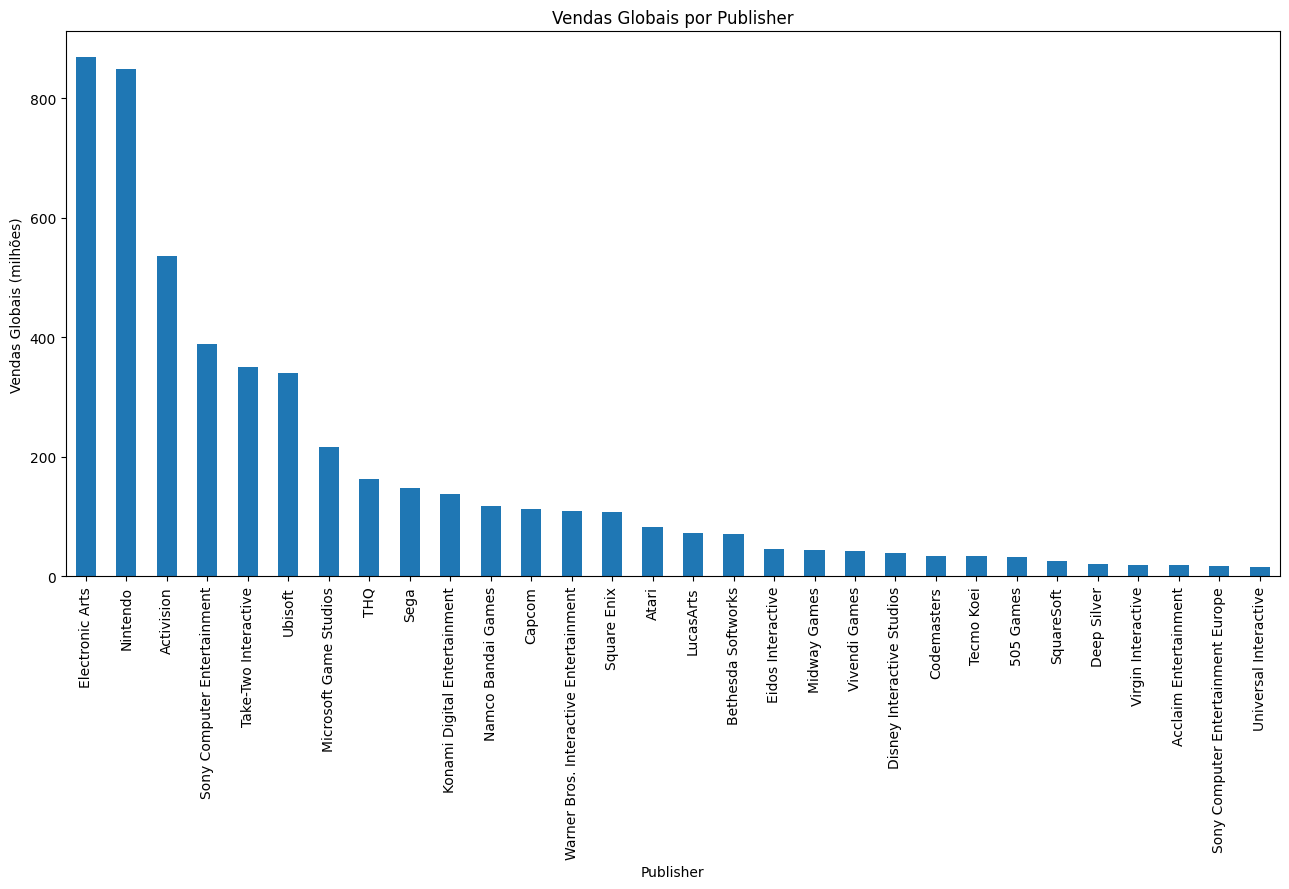

In [188]:
sales_per_publisher = vg.groupby('Publisher')['Global_Sales'].sum()
sales_per_publisher.sort_values(ascending=False).head(30).plot(kind='bar', figsize=(13,9))
plt.title('Vendas Globais por Publisher')
plt.xlabel('Publisher')
plt.ylabel('Vendas Globais (milhões)')
plt.tight_layout()
plt.show()

Faça uma tabela onde, para cada ano é listada a publisher com mais vendas globais naquele ano

In [39]:
publisher_sales = vg.groupby(['Year_of_Release', 'Publisher'])['Global_Sales'].sum()
publisher_sales_per_year = publisher_sales.groupby('Year_of_Release').idxmax()
top_publishers = publisher_sales[publisher_sales_per_year]
top_publishers



Year_of_Release  Publisher                  
1980.0           Atari                            8.36
1981.0           Activision                       8.50
1982.0           Atari                           19.43
1983.0           Nintendo                        10.96
1984.0           Nintendo                        45.56
1985.0           Nintendo                        49.95
1986.0           Nintendo                        16.18
1987.0           Nintendo                        11.95
1988.0           Nintendo                        36.44
1989.0           Nintendo                        63.88
1990.0           Nintendo                        35.49
1991.0           Nintendo                        15.97
1992.0           Nintendo                        38.11
1993.0           Nintendo                        20.04
1994.0           Nintendo                        24.99
1995.0           Sony Computer Entertainment     18.45
1996.0           Nintendo                        73.70
1997.0           Son

# Dataset 2



In [4]:
data_movies = pd.read_csv("./dataset/Marvel_Movies_Dataset.csv")
data_movies

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
0,0,Iron Man,Jon Favreau,NaN,2008-05-02 00:00:00,7.9,79,94,91,3.7,A,140.0,319.0,585.8
1,1,The Incredible Hulk,Louis Leterrier,NaN,2008-06-13 00:00:00,6.6,61,68,69,2.5,A-,150.0,134.8,265.5
2,2,Iron Man 2,Jon Favreau,NaN,2010-05-07 00:00:00,6.9,57,72,71,2.9,A,200.0,312.4,623.9
3,3,Thor,Kenneth Branagh,NaN,2011-05-06 00:00:00,7.0,57,77,76,2.8,B+,150.0,181.0,449.3
4,4,Captain America: The First Avenger,Joe Johnston,NaN,2011-07-22 00:00:00,6.9,66,80,75,3.3,A-,215.0,176.7,370.6
5,5,The Avengers,Joss Whedon,NaN,2012-05-04 00:00:00,8.0,69,91,91,3.7,A+,225.0,623.4,1521.0
6,6,Iron Man 3,Shane Black,NaN,2013-05-03 00:00:00,7.1,62,79,78,3.0,A,200.0,409.0,1215.0
7,7,Thor: The Dark World,Alan Taylor,NaN,2013-11-08 00:00:00,6.7,54,67,75,2.2,A-,272.0,206.4,644.8
8,8,Captain America: The Winter Soldier,Anthony Russo,Joe Russo,2014-04-04 00:00:00,7.7,70,90,92,3.7,A,177.0,259.8,714.4
9,9,Guardians of the Galaxy,James Gunn,NaN,2014-08-01 00:00:00,8.0,76,92,92,3.8,A,196.0,333.7,773.4


Qual filme teve o maior orçamento?

In [6]:
data_movies.groupby(['Title', 'Budget (in million $)'])['Budget (in million $)'].sum().idxmax()

('Avengers: Endgame', np.float64(400.0))

Qual é a média dos valores de IMDb para todos os filmes?

In [62]:
data_movies['IMDb (scored out of 10)'].mean()

np.float64(7.2441176470588236)

Quantos filmes possuem uma pontuação de Rotten Tomatoes - Critics maior que 80%?

In [45]:
movies_rotten_critics_greater_than_80 = data_movies[data_movies['Rotten Tomatoes - Critics (scored out of 100%)'] > 80]
movies_rotten_critics_greater_than_80.groupby('Title')['Rotten Tomatoes - Critics (scored out of 100%)'].sum().count()

np.int64(19)

Quais diretores (diretor principal ou secundário) dirigiram mais de um filme no dataset?

In [5]:
directors = pd.concat([data_movies['Director (1)'], data_movies['Director (2)']]).value_counts()
directors_multiple_films = directors[directors > 1]
directors_multiple_films

Anthony Russo    4
Joe Russo        4
Peyton Reed      3
James Gunn       3
Jon Watts        3
Joss Whedon      2
Jon Favreau      2
Taika Waititi    2
Ryan Coogler     2
Name: count, dtype: int64

Qual é a correlação entre o orçamento e o lucro bruto doméstico?

In [ ]:
data_movies_notnull = data_movies[data_movies['Budget (in million $)'].notnull()]
data_movies_notnull = data_movies[data_movies['Domestic Gross (in million $)'].notnull()]
correlation = data_movies_notnull['Domestic Gross (in million $)'].corr(data_movies_notnull['Budget (in million $)'])
correlation

np.float64(0.3572802968186996)

Quais filmes obtiveram um CinemaScore "A+"?

In [6]:
data_movies[data_movies['CinemaScore (grades A+ to F)'] == 'A+']

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
5,5,The Avengers,Joss Whedon,NaN,2012-05-04 00:00:00,8.0,69,91,91,3.7,A+,225.0,623.4,1521.0
17,17,Black Panther,Ryan Coogler,NaN,2018-02-16 00:00:00,7.3,88,96,79,3.7,A+,200.0,700.4,1350.0
21,21,Avengers: Endgame,Anthony Russo,Joe Russo,2019-04-26 00:00:00,8.4,78,94,90,3.9,A+,400.0,858.4,2799.0
26,26,Spider-Man: No Way Home,Jon Watts,NaN,2021-12-17 00:00:00,8.2,71,93,98,3.8,A+,200.0,814.9,1952.0


Qual foi o filme com a maior pontuação no Letterboxd?

In [7]:
highest_score = data_movies['Letterboxd (scored out of 5)'].max()
movies_highest_letterboxd_grade = data_movies[data_movies['Letterboxd (scored out of 5)'] == highest_score]
movies_highest_letterboxd_grade.head(1)

,Index,Title,Director (1),Director (2),Release Date (DD-MM-YYYY),IMDb (scored out of 10),IMDB Metascore (scored out of 100),Rotten Tomatoes - Critics (scored out of 100%),Rotten Tomatoes - Audience (scored out of 100%),Letterboxd (scored out of 5),CinemaScore (grades A+ to F),Budget (in million $),Domestic Gross (in million $),Worldwide Gross (in million $)
18,18,Avengers: Infinity War,Anthony Russo,Joe Russo,2018-04-27 00:00:00,8.4,68,85,92,4.0,A,400.0,678.8,2052.0


Quantos filmes têm um lucro bruto mundial superior a 500 milhões de dólares?

In [8]:
data_movies[data_movies['Worldwide Gross (in million $)'] > 500.0]['Title'].index.size

26

Qual foi o filme mais bem avaliado em Rotten Tomatoes - Critics e Rotten Tomatoes - Audience juntos?

In [9]:

rotten_tomatoes = data_movies.groupby(['Title', 'Rotten Tomatoes - Critics (scored out of 100%)', 'Rotten Tomatoes - Audience (scored out of 100%)'])[['Rotten Tomatoes - Critics (scored out of 100%)', 'Rotten Tomatoes - Audience (scored out of 100%)']].sum().mean(axis=1).sort_values(ascending=False).head(1)
rotten_tomatoes

Title                    Rotten Tomatoes - Critics (scored out of 100%)  Rotten Tomatoes - Audience (scored out of 100%)
Spider-Man: No Way Home  93                                              98                                                 95.5
dtype: float64

Qual é a distribuição dos orçamentos dos filmes (mínimo, máximo, quartis)?

In [10]:
print(f'o minimo: {data_movies.groupby('Index')['Budget (in million $)'].sum().min()}')
print(f'o maximo: {data_movies.groupby('Index')['Budget (in million $)'].sum().max()}')
print(f'o primeiro quartil: {data_movies.groupby('Index')['Budget (in million $)'].sum().quantile(0.25)}')
print(f'o segundo quartil: {data_movies.groupby('Index')['Budget (in million $)'].sum().quantile(0.50)}')
print(f'o terceiro quartil: {data_movies.groupby('Index')['Budget (in million $)'].sum().quantile(0.75)}')


o minimo: 140.0
o maximo: 400.0
o primeiro quartil: 183.75
o segundo quartil: 200.0
o terceiro quartil: 250.0


Quais são os 5 filmes mais antigos no dataset?

In [11]:
date_release_movies = pd.to_datetime(data_movies.groupby('Title')['Release Date (DD-MM-YYYY)'].sum())
date_release_movies.sort_values().head(5)

Title
Iron Man                             2008-05-02
The Incredible Hulk                  2008-06-13
Iron Man 2                           2010-05-07
Thor                                 2011-05-06
Captain America: The First Avenger   2011-07-22
Name: Release Date (DD-MM-YYYY), dtype: datetime64[ns]

Qual é a relação entre o IMDb Metascore e o Rotten Tomatoes - Critics?

Correlação entre Metascore e Rotten Tomatoes - Critics: 0.8905270040996295


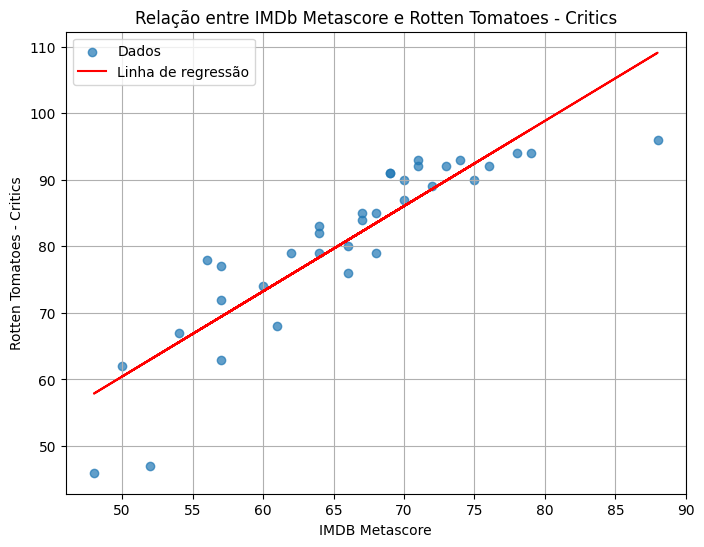

In [13]:
correlacao = data_movies['IMDB Metascore (scored out of 100)'].corr(data_movies['Rotten Tomatoes - Critics (scored out of 100%)'])
print(f'Correlação entre Metascore e Rotten Tomatoes - Critics: {correlacao}')
slope, intercept, r_value, p_value, std_err = linregress(data_movies['IMDB Metascore (scored out of 100)'], data_movies['Rotten Tomatoes - Critics (scored out of 100%)'])
plt.figure(figsize=(8, 6))
plt.scatter(data_movies['IMDB Metascore (scored out of 100)'], data_movies['Rotten Tomatoes - Critics (scored out of 100%)'], alpha=0.7, label='Dados')
plt.plot(data_movies['IMDB Metascore (scored out of 100)'], slope * data_movies['IMDB Metascore (scored out of 100)'] + intercept, color='red', label='Linha de regressão')
plt.title('Relação entre IMDb Metascore e Rotten Tomatoes - Critics')
plt.xlabel('IMDB Metascore')
plt.ylabel('Rotten Tomatoes - Critics')
plt.grid(True)
plt.legend()
plt.show()


Quais filmes tiveram mais sucesso mundial (Worldwide Gross) em relação ao seu orçamento?

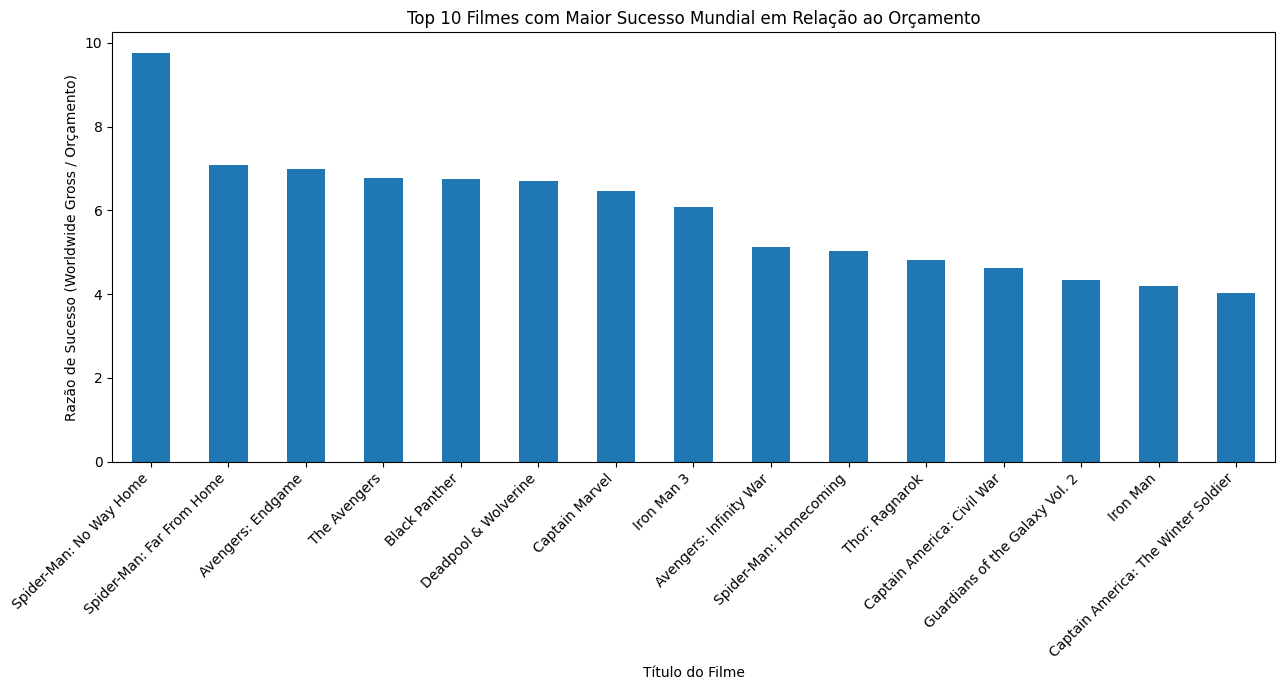

In [16]:
data_movies['Success Ratio'] = data_movies['Worldwide Gross (in million $)'] / data_movies['Budget (in million $)']
data_movies = data_movies[data_movies['Budget (in million $)'] > 0]
top_success_movies = data_movies.sort_values(by='Success Ratio', ascending=False)
top_success_movies.head(15).plot(kind='bar', x='Title', y='Success Ratio', figsize=(13,7), legend=False)
plt.title('Top 10 Filmes com Maior Sucesso Mundial em Relação ao Orçamento')
plt.xlabel('Título do Filme')
plt.ylabel('Razão de Sucesso (Worldwide Gross / Orçamento)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Qual foi a média de Rotten Tomatoes - Audience para os filmes lançados antes de 2010?

In [50]:
from datetime import datetime
year_2010 = datetime(2010, 1, 1, 1)
data_movies['Release Date (DD-MM-YYYY)'] = pd.to_datetime(data_movies['Release Date (DD-MM-YYYY)'])
release_date_2010 = data_movies[data_movies['Release Date (DD-MM-YYYY)'] < year_2010]
release_date_2010['Rotten Tomatoes - Audience (scored out of 100%)'].mean()

np.float64(80.0)

Quantos filmes no dataset possuem dois diretores listados?

In [14]:
data_movies_two_directors = data_movies[data_movies['Director (2)'].notnull()]
data_movies_two_directors.index.size

5